In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [146]:
df = pd.read_csv('new.csv')
df.shape

(27820, 12)

In [147]:
df.describe()

,year,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455979e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453907e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.600000e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.810000e+13,126352.000000


In [148]:
df = df.rename(columns={' gdp_for_year':'gdp_for_year'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k_pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI_for_year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  float64
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


In [149]:
df['HDI_for_year'] = df['HDI_for_year'].fillna(0)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k_pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI_for_year       27820 non-null  float64
 9   gdp_for_year       27820 non-null  float64
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


In [157]:
df['country'].drop_duplicates().head(100)

0                     Albania
264       Antigua and Barbuda
588                 Argentina
960                   Armenia
1248                    Aruba
                 ...         
26244    United Arab Emirates
26316          United Kingdom
26688           United States
27060                 Uruguay
27396              Uzbekistan
Name: country, Length: 100, dtype: object

In [151]:
df['sex'].drop_duplicates()

0      male
2    female
Name: sex, dtype: object

In [152]:
df['year'].drop_duplicates().sort_values()


264     1985
276     1986
0       1987
12      1988
24      1989
324     1990
336     1991
36      1992
48      1993
60      1994
72      1995
84      1996
96      1997
108     1998
120     1999
132     2000
144     2001
156     2002
168     2003
180     2004
192     2005
204     2006
216     2007
228     2008
240     2009
252     2010
900     2011
540     2012
552     2013
564     2014
576     2015
1248    2016
Name: year, dtype: int64

In [153]:
df.loc[df['year'].isnull()]

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation


In [154]:
df['generation'].drop_duplicates()

0         Generation X
1               Silent
3      G.I. Generation
4              Boomers
44          Millenials
226       Generation Z
Name: generation, dtype: object

filtering and sorting

In [155]:
df = df.drop(df[df['year']==2016].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27660 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27660 non-null  object 
 1   year               27660 non-null  int64  
 2   sex                27660 non-null  object 
 3   age                27660 non-null  object 
 4   suicides_no        27660 non-null  int64  
 5   population         27660 non-null  int64  
 6   suicides/100k_pop  27660 non-null  float64
 7   country-year       27660 non-null  object 
 8   HDI_for_year       27660 non-null  float64
 9   gdp_for_year       27660 non-null  float64
 10  gdp_per_capita     27660 non-null  int64  
 11  generation         27660 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.7+ MB


In [156]:
country_code = pd.read_csv('all.csv')
country_code = country_code.replace('United States of America','United States')
country_code = country_code.replace('Czechia','Czech Republic')
country_code = country_code.replace('Macao','Macau')
country_code = country_code.replace('Korea, Republic of','Republic of Korea')
country_code = country_code.replace('Saint Vincent and the Grenadines','Saint Vincent and Grenadines')
country_code = country_code.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')


df = pd.merge(df,country_code[['name','alpha-3']], left_on='country', right_on='name', how='left')
df.loc[df['country'] =='United States' ]



,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,name,alpha-3
26688,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,4.350000e+12,19693,G.I. Generation,United States,USA
26689,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,4.350000e+12,19693,G.I. Generation,United States,USA
26690,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,4.350000e+12,19693,Boomers,United States,USA
26691,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,4.350000e+12,19693,Silent,United States,USA
26692,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,4.350000e+12,19693,Generation X,United States,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27055,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,0.000,1.810000e+13,60387,Millenials,United States,USA
27056,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,0.000,1.810000e+13,60387,Millenials,United States,USA
27057,United States,2015,female,75+ years,540,11778666,4.58,United States2015,0.000,1.810000e+13,60387,Silent,United States,USA
27058,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,0.000,1.810000e+13,60387,Generation Z,United States,USA


7056                   Czech Republic
15588                           Macau
20100               Republic of Korea
21492    Saint Vincent and Grenadines
26316                  United Kingdom
26688                   United States
Name: country, dtype: object

In [38]:
overall_population = df.groupby(['year'], as_index =False).sum()[['year', 'population','suicides_no']]
overall_kpi = df[['year','suicides/100k_pop','HDI_for_year','gdp_for_year','gdp_per_capita']].groupby(['year'], as_index = False).mean()
overall_overtime = pd.merge(overall_population, overall_kpi, left_on='year', right_on='year', how='left')
overall_overtime['suicides_rate'] = overall_overtime['suicides_no']/overall_overtime['population']*100000

overall_overtime.insert(0,"country",value="overall")
overall_overtime



,country,year,population,suicides_no,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,suicides_rate
0,overall,1985,1008600086,116063,11.826198,0.538937,1.927154e+11,6091.229167,11.507336
1,overall,1986,1029909613,120670,11.423333,0.000000,2.302174e+11,7126.104167,11.716562
2,overall,1987,1095029726,126842,11.644213,0.000000,2.402939e+11,8712.592593,11.583430
3,overall,1988,1054094424,121026,12.709405,0.000000,2.984858e+11,9983.857143,11.481514
4,overall,1989,1225514347,160244,12.879071,0.000000,3.071628e+11,9725.038462,13.075653
5,overall,1990,1466620100,193361,12.862956,0.559219,3.077757e+11,9806.328125,13.184123
6,overall,1991,1489988384,198020,13.438880,0.000000,3.280319e+11,10132.937500,13.290036
7,overall,1992,1569539447,211473,13.498564,0.000000,3.437513e+11,10506.707692,13.473570
8,overall,1993,1530416654,221565,13.833705,0.000000,3.473947e+11,10553.584615,14.477430
9,overall,1994,1548749372,232063,14.073272,0.000000,3.600784e+11,11567.102941,14.983896


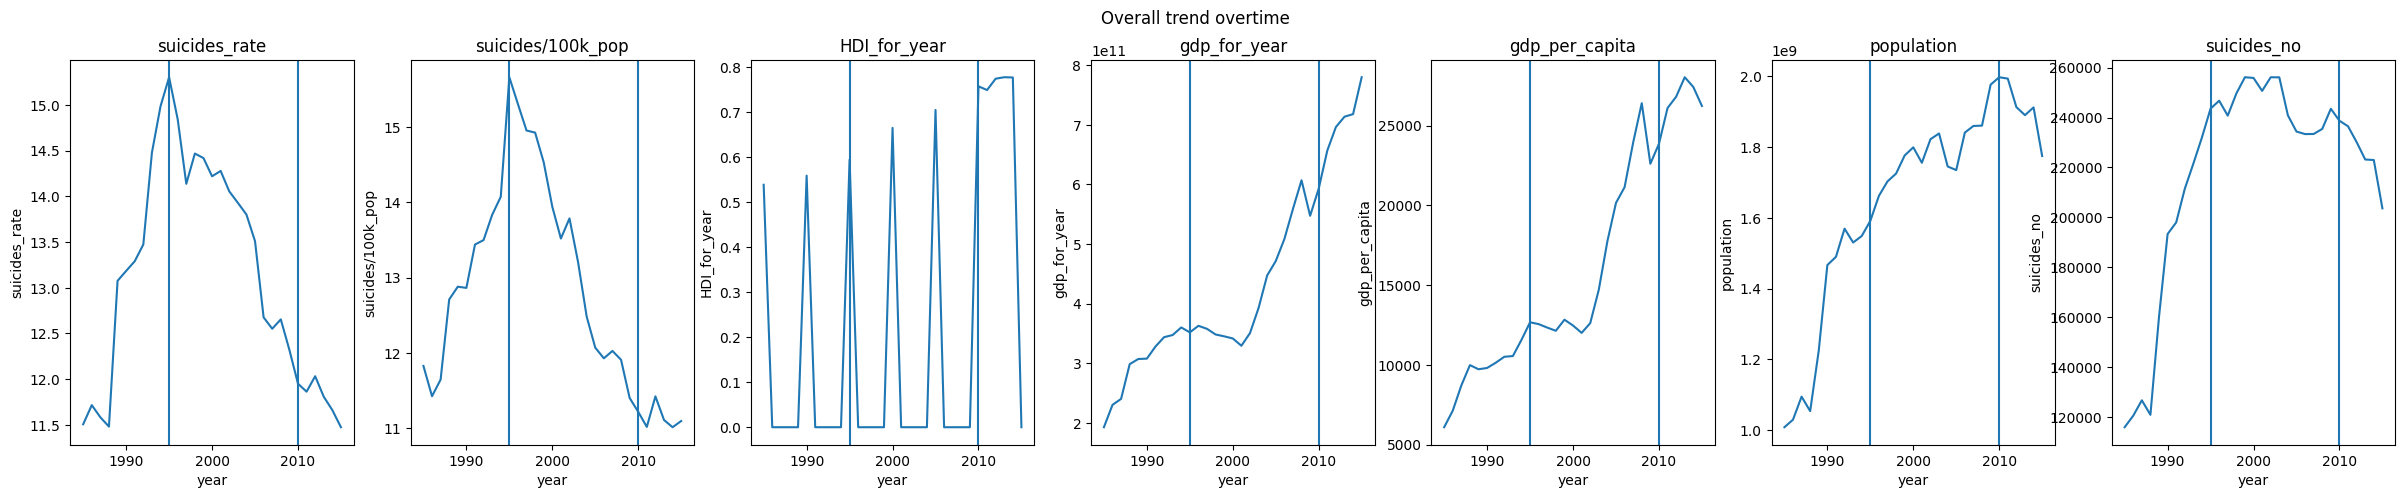

In [13]:
figure, axes = plt.subplots(1, 7, sharex=True, figsize=(30,5))
figure.suptitle('Overall trend overtime')
axes[0].set_title('suicides_rate')
axes[1].set_title('suicides/100k_pop')
axes[2].set_title('HDI_for_year')
axes[3].set_title('gdp_for_year')
axes[4].set_title('gdp_per_capita')
axes[5].set_title('population')
axes[6].set_title('suicides_no')

sns.lineplot(ax = axes[0], x=overall_overtime.year, y = overall_overtime.suicides_rate)
axes[0].axvline(1995)
axes[0].axvline(2010)
sns.lineplot(ax = axes[1], x=overall_overtime.year, y = overall_overtime['suicides/100k_pop'])
axes[1].axvline(1995)
axes[1].axvline(2010)
sns.lineplot(ax = axes[2], x=overall_overtime.year, y = overall_overtime.HDI_for_year)
axes[2].axvline(1995)
axes[2].axvline(2010)
sns.lineplot(ax = axes[3], x=overall_overtime.year, y = overall_overtime.gdp_for_year)
axes[3].axvline(1995)
axes[3].axvline(2010)
sns.lineplot(ax = axes[4], x=overall_overtime.year, y = overall_overtime.gdp_per_capita)
axes[4].axvline(1995)
axes[4].axvline(2010)
sns.lineplot(ax = axes[5], x=overall_overtime.year, y = overall_overtime.population)
axes[5].axvline(1995)
axes[5].axvline(2010)
sns.lineplot(ax = axes[6], x=overall_overtime.year, y = overall_overtime.suicides_no)
axes[6].axvline(1995)
axes[6].axvline(2010)



In [14]:
overall_by_country_overtime_population = df.groupby(['country', 'year'], as_index = False).sum()[['country', 'year','population','suicides_no']]
overall_by_country_overtime_population['suicides_rate'] = overall_by_country_overtime_population['suicides_no']/overall_by_country_overtime_population['population']*100
overall_by_country_overtime_population

overall_by_country_overtime_kpi = df[['year','country','suicides/100k_pop','HDI_for_year','gdp_for_year','gdp_per_capita']].groupby(['country','year'], as_index = False).mean()
overall_by_country_overtime_kpi

overall_by_country_overtime = pd.merge(overall_by_country_overtime_population, overall_by_country_overtime_kpi, left_on=['country','year'], right_on=['country','year'], how='left')
overall_by_country_overtime

,country,year,population,suicides_no,suicides_rate,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita
0,Albania,1987,2709600,73,0.002694,2.654167,0.000,2.156625e+09,796.0
1,Albania,1988,2764300,63,0.002279,2.705000,0.000,2.126000e+09,769.0
2,Albania,1989,2803100,68,0.002426,2.783333,0.000,2.335125e+09,833.0
3,Albania,1992,2822500,47,0.001665,1.500000,0.000,7.094526e+08,251.0
4,Albania,1993,2807300,73,0.002600,2.713333,0.000,1.228071e+09,437.0
...,...,...,...,...,...,...,...,...,...
2300,Uzbekistan,2010,25651783,1464,0.005707,5.269167,0.655,3.933277e+10,1533.0
2301,Uzbekistan,2011,25978049,1640,0.006313,5.595000,0.661,4.591519e+10,1767.0
2302,Uzbekistan,2012,26381830,1835,0.006956,6.460833,0.668,5.182157e+10,1964.0
2303,Uzbekistan,2013,26838924,1950,0.007266,6.571667,0.672,5.769045e+10,2150.0


In [15]:
overall_by_country = overall_by_country_overtime[['country','year','suicides_rate','suicides/100k_pop','gdp_for_year','gdp_per_capita']].groupby(['country'], as_index= False).mean().sort_values(by=['suicides/100k_pop'], ascending = False)
overall_by_country['yield']=overall_by_country['suicides/100k_pop']/sum(overall_by_country['suicides/100k_pop'])*100
overall_by_country["cumpercentage"] = overall_by_country['yield'].cumsum()
overall_by_country

,country,year,suicides_rate,suicides/100k_pop,gdp_for_year,gdp_per_capita,yield,cumpercentage
52,Lithuania,2005.000000,0.041075,40.583968,2.711290e+10,9024.142857,3.390750,3.390750
86,Sri Lanka,1997.545455,0.030848,35.295152,1.532645e+10,904.272727,2.948874,6.339624
74,Russian Federation,2002.000000,0.032703,34.892377,8.840370e+11,6518.814815,2.915223,9.254847
40,Hungary,2003.000000,0.029962,33.049100,8.832945e+10,9234.120000,2.761219,12.016066
11,Belarus,2001.095238,0.030231,31.075913,3.067641e+10,3333.904762,2.596361,14.612427
...,...,...,...,...,...,...,...,...
64,Oman,2011.000000,0.000388,0.736111,6.270247e+10,20740.666667,0.061501,99.910213
1,Antigua and Barbuda,1999.481481,0.000541,0.552901,8.035452e+08,10448.185185,0.046194,99.956407
45,Jamaica,1998.058824,0.000443,0.521765,7.954517e+09,3301.235294,0.043593,100.000000
75,Saint Kitts and Nevis,1991.000000,0.000000,0.000000,2.160186e+08,5525.000000,0.000000,100.000000


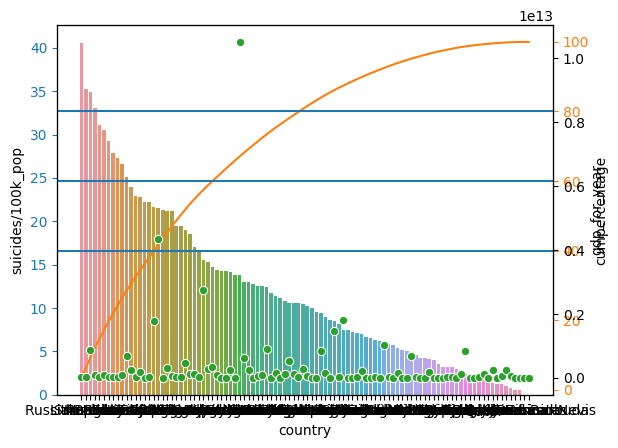

In [16]:
fig, ax = plt.subplots()
ax = sns.barplot(x=overall_by_country['country'], y = overall_by_country['suicides/100k_pop'])
ax2 = ax.twinx()
ax2 = sns.lineplot(x= overall_by_country['country'], y = overall_by_country['cumpercentage'], color="C1",  )

ax3 = ax.twinx()
ax3 = sns.lineplot(x= overall_by_country['country'], y = overall_by_country['gdp_for_year'], marker='o', linestyle='', color="C2",  )

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax2.axhline(80)
ax2.axhline(60)
ax2.axhline(40)


In [17]:
overall_by_country[overall_by_country['suicides/100k_pop']>15].count()

country              29
year                 29
suicides_rate        29
suicides/100k_pop    29
gdp_for_year         29
gdp_per_capita       29
yield                29
cumpercentage        29
dtype: int64

In [18]:
overall_by_generation_population = df.groupby(['generation'], as_index = False).sum()[['generation','population','suicides_no']]
overall_by_generation_population
overall_by_generation_kpi = df[['generation','suicides/100k_pop','HDI_for_year','gdp_for_year','gdp_per_capita']].groupby(['generation'], as_index = False).mean()
overall_by_generation_kpi
overall_by_generation = pd.merge(overall_by_generation_population, overall_by_generation_kpi, left_on=['generation'], right_on=['generation'], how='left')
overall_by_generation['sort'] = [3,1,4,6,5,2]
overall_by_generation = overall_by_generation.sort_values(['sort'], ascending = True)
overall_by_generation

,generation,population,suicides_no,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,sort
1,G.I. Generation,2126202724,510009,23.946378,0.165407,3.105104e+11,10393.407434,1
5,Silent,9210567348,1779887,18.406306,0.210743,4.562347e+11,17550.069488,2
0,Boomers,13318427149,2279783,14.740224,0.191451,4.311544e+11,15919.500605,3
2,Generation X,13424794317,1527038,10.543115,0.242552,4.187047e+11,15554.471455,4
4,Millenials,10606523160,620194,5.344246,0.272996,4.964162e+11,18977.390657,5
3,Generation Z,2503541842,15906,0.642299,0.430986,6.460947e+11,25631.672109,6


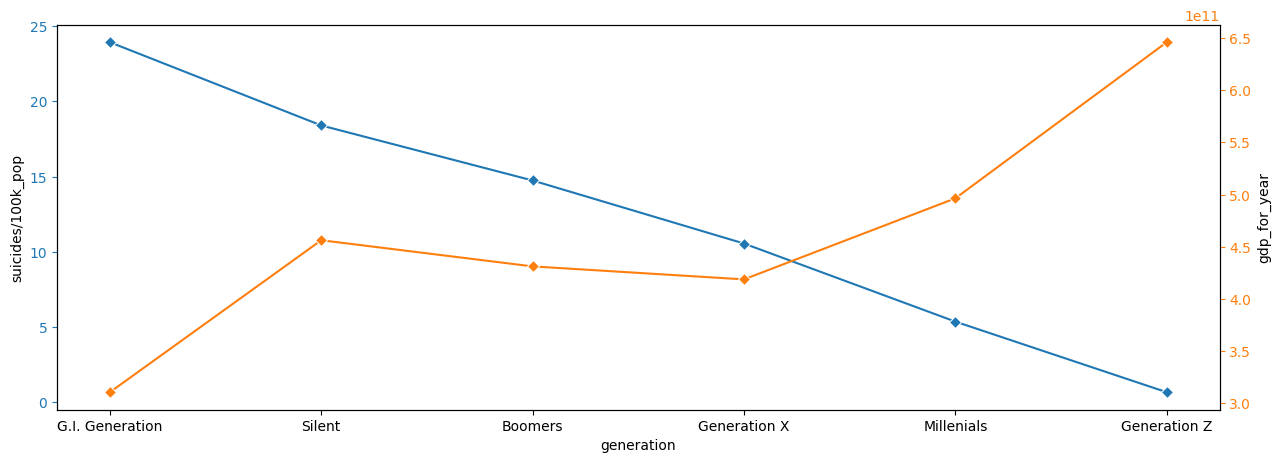

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
ax =  sns.lineplot(x= overall_by_generation['generation'], y = overall_by_generation['suicides/100k_pop'], color="C0", marker="D" )
ax2 = ax.twinx()
ax2 = sns.lineplot(x= overall_by_generation['generation'], y = overall_by_generation['gdp_for_year'], color="C1",  marker="D")

ax.tick_params(axis="y", colors="C0")

ax2.tick_params(axis="y", colors="C1")


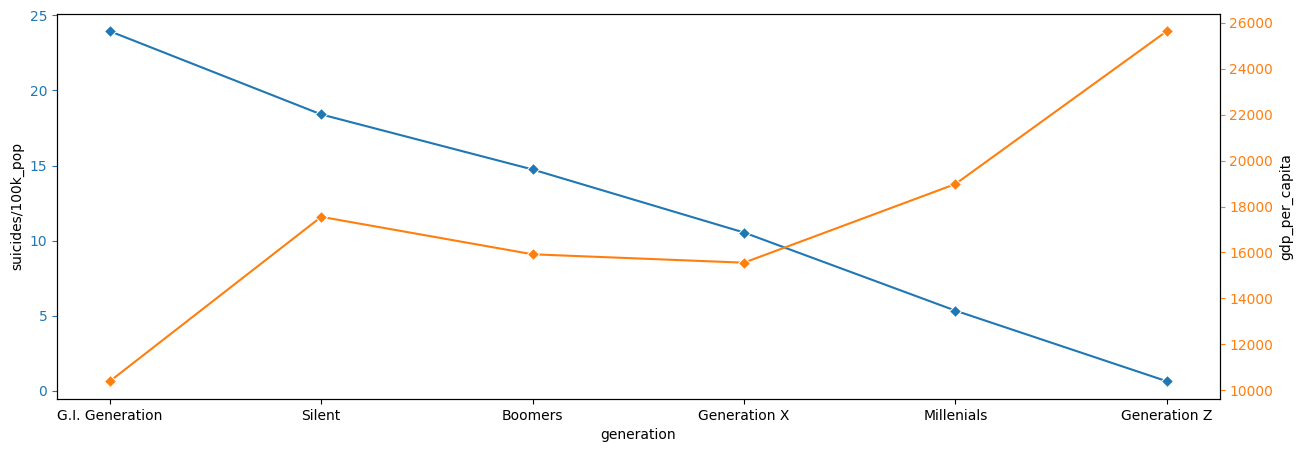

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
ax =  sns.lineplot(x= overall_by_generation['generation'], y = overall_by_generation['suicides/100k_pop'], color="C0", marker="D" )
ax2 = ax.twinx()
ax2 = sns.lineplot(x= overall_by_generation['generation'], y = overall_by_generation['gdp_per_capita'], color="C1",  marker="D")

ax.tick_params(axis="y", colors="C0")

ax2.tick_params(axis="y", colors="C1")

In [21]:
overall_by_age_population = df.groupby(['age'], as_index = False).sum()[['age','population','suicides_no']]
overall_by_age_population
overall_by_age_kpi = df[['age','suicides/100k_pop','HDI_for_year','gdp_for_year','gdp_per_capita']].groupby(['age'], as_index = False).mean()
overall_by_age_kpi
overall_by_age = pd.merge(overall_by_age_population, overall_by_age_kpi, left_on=['age'], right_on=['age'], how='left')
overall_by_age = overall_by_age.replace('5-14 years','05-14 years').sort_values(by=['age'], ascending = True)
overall_by_age

,age,population,suicides_no,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita
3,05-14 years,8398693237,52264,0.620041,0.234833,4.471182e+11,16815.56833
0,15-24 years,8622650558,807347,8.957182,0.234833,4.471182e+11,16815.56833
1,25-34 years,8415461883,1121842,12.199479,0.234833,4.471182e+11,16815.56833
2,35-54 years,14328573148,2446375,14.958887,0.234833,4.471182e+11,16815.56833
4,55-74 years,8771160760,1653728,16.163380,0.234833,4.471182e+11,16815.56833
5,75+ years,2653516954,651261,23.976614,0.234833,4.471182e+11,16815.56833


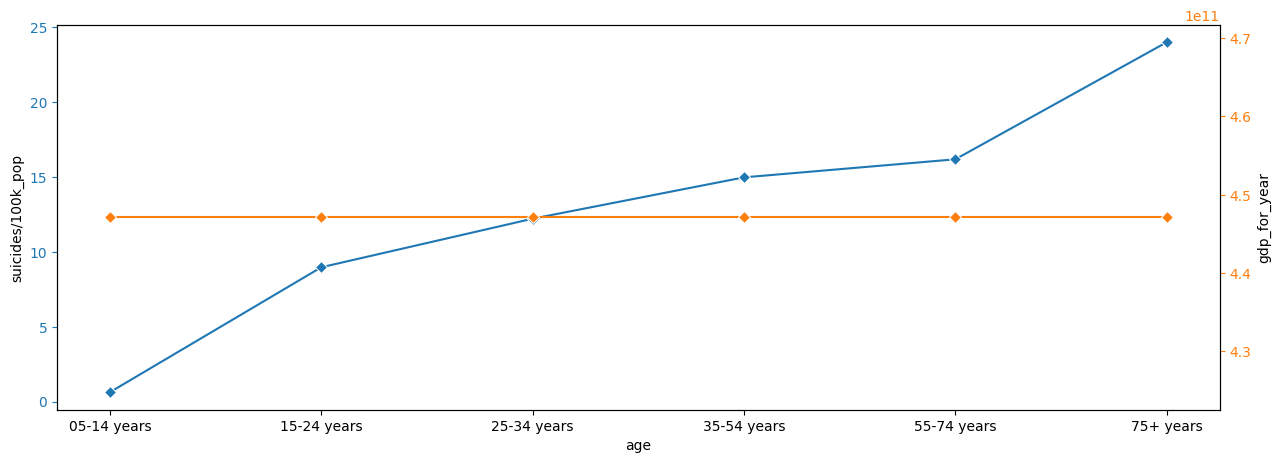

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
ax =  sns.lineplot(x= overall_by_age['age'], y = overall_by_age['suicides/100k_pop'], color="C0", marker="D" )
ax2 = ax.twinx()
ax2 = sns.lineplot(x= overall_by_age['age'], y = overall_by_age['gdp_for_year'], color="C1",  marker="D")

ax.tick_params(axis="y", colors="C0")

ax2.tick_params(axis="y", colors="C1")

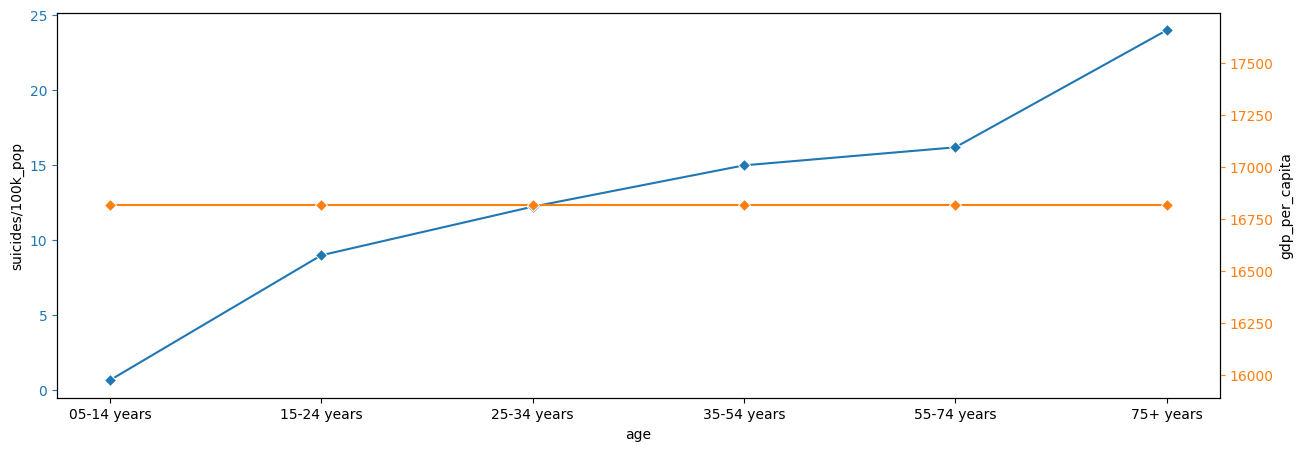

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
ax =  sns.lineplot(x= overall_by_age['age'], y = overall_by_age['suicides/100k_pop'], color="C0", marker="D" )
ax2 = ax.twinx()
ax2 = sns.lineplot(x= overall_by_age['age'], y = overall_by_age['gdp_per_capita'], color="C1",  marker="D")

ax.tick_params(axis="y", colors="C0")

ax2.tick_params(axis="y", colors="C1")

In [24]:
overall_by_generation_population_overtime = df.groupby(['generation','year'],as_index=False).sum()[['generation','year','population']]
overall_by_generation_population_overtime
overall_by_generation_kpi_overtime = df[['generation','year','suicides/100k_pop','HDI_for_year','gdp_for_year','gdp_per_capita']].groupby(['generation','year'], as_index=False).mean()
overall_by_generation_kpi_overtime

overall_by_generation_overtime = pd.merge(overall_by_generation_population_overtime,overall_by_generation_kpi_overtime,left_on=['generation','year'],right_on=['generation','year'],how='left')
overall_by_generation_overtime

,generation,year,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita
0,Boomers,1985,173536624,10.008750,0.538937,1.927154e+11,6091.229167
1,Boomers,1986,176214788,10.593854,0.000000,2.302174e+11,7126.104167
2,Boomers,1987,188988532,10.960370,0.000000,2.402939e+11,8712.592593
3,Boomers,1988,181934957,12.410102,0.000000,2.984858e+11,9983.857143
4,Boomers,1989,213566446,12.178173,0.000000,3.071628e+11,9725.038462
...,...,...,...,...,...,...,...
137,Silent,2011,117475364,19.351628,0.749512,6.568464e+11,26100.918605
138,Silent,2012,119082315,20.721235,0.774728,6.963183e+11,26808.950617
139,Silent,2013,119719189,19.389063,0.778000,7.136058e+11,28032.675000
140,Silent,2014,123129495,20.590256,0.777423,7.179335e+11,27420.141026


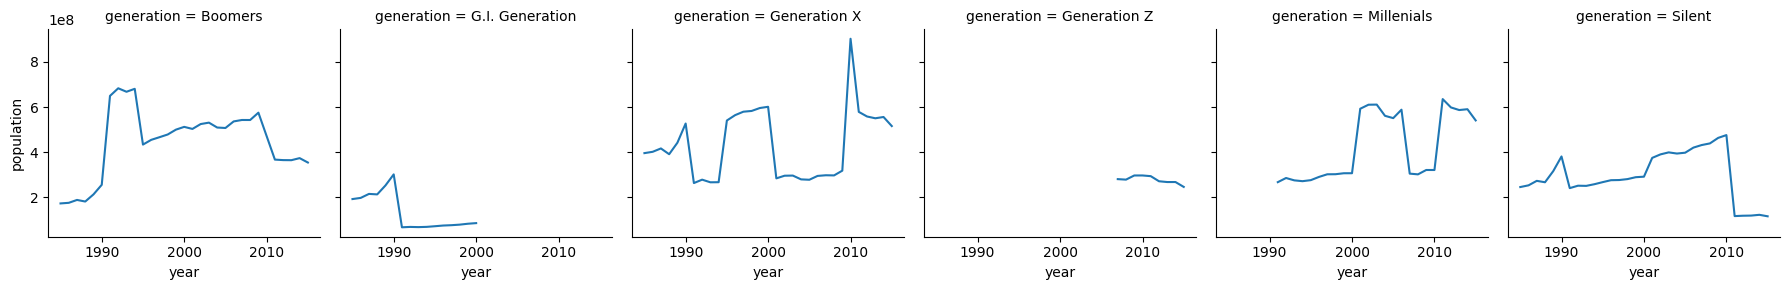

In [25]:


sea = sns.FacetGrid(overall_by_generation_overtime, col='generation')
sea.map(sns.lineplot, 'year', 'population')


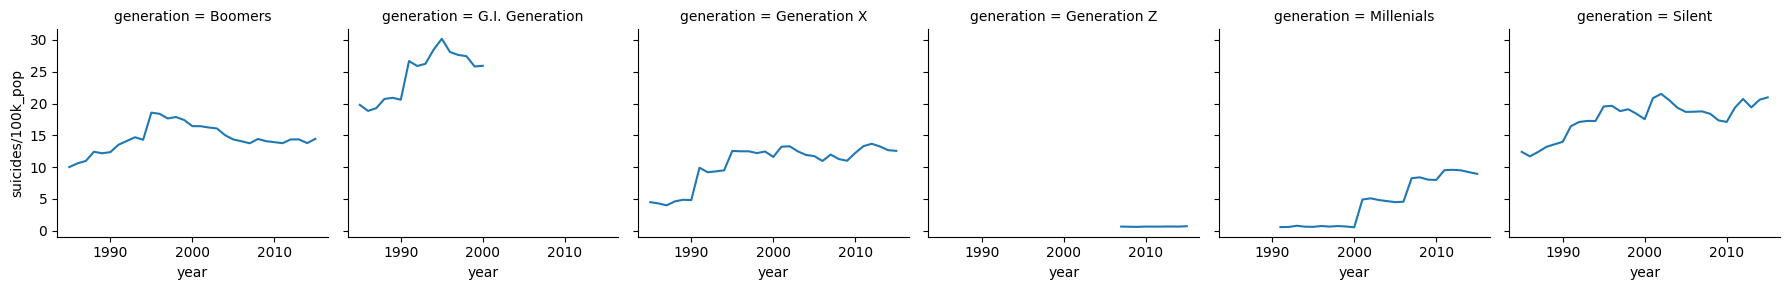

In [26]:
sea = sns.FacetGrid(overall_by_generation_overtime, col='generation')
sea.map(sns.lineplot,'year','suicides/100k_pop')

([<matplotlib.patches.Wedge at 0x20feacc3a50>,
 [Text(0.7204437626506176, 0.8312405096347392, 'Boomers'),
  Text(-0.31023052159182, 1.0553468735315736, 'G.I. Generation'),
  Text(-1.096948978843402, 0.0818714713097167, 'Generation X'),
  Text(-0.03559743670069254, -1.0994238593464944, 'Millenials'),
  Text(0.9498410829245773, -0.5547989880926845, 'Silent')],
 [Text(0.392969325082155, 0.4534039143462213, '27%'),
  Text(-0.16921664814099271, 0.5756437491990402, '5%'),
  Text(-0.5983358066418556, 0.04465716616893638, '34%'),
  Text(-0.019416783654923202, -0.5996857414617242, '17%'),
  Text(0.5180951361406785, -0.3026176298687369, '17%')])

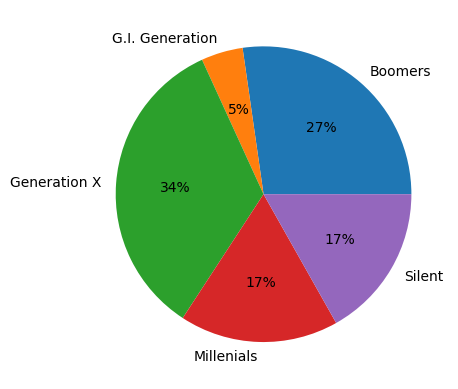

In [27]:
generation_in = overall_by_generation_overtime[overall_by_generation_overtime['year']==1995]
plt.pie(generation_in['population'], labels=generation_in['generation'], autopct='%.0f%%')

In [ ]:
sns.set(font_scale=1)
sea = sns.FacetGrid(overall_by_generation_overtime, row='year',height=3, aspect= 3)
sea.map(sns.barplot,'generation','population', order =['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])
sea.add_legend()

In [ ]:
sns.set(font_scale=1)
sea = sns.FacetGrid(overall_by_generation_overtime, row='year',height=3, aspect= 3)
sea.map(sns.barplot,'generation','suicides/100k_pop', order =['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'] )
sea.add_legend()

In [30]:
top_30_country = overall_by_country[overall_by_country['suicides/100k_pop']>15]['country'].tolist()
top_30_country_data = df.loc[df['country'].isin(top_30_country) & df['year'].isin([1995,2010])]
top_30_country_data = top_30_country_data.assign(group="high_suicide_rate_country")
top_30_country_data


,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,group
1906,Austria,1995,male,75+ years,184,147262,124.95,Austria1995,0.815,2.410000e+11,32237,G.I. Generation,high_suicide_rate_country
1907,Austria,1995,male,55-74 years,333,670553,49.66,Austria1995,0.815,2.410000e+11,32237,Silent,high_suicide_rate_country
1908,Austria,1995,male,35-54 years,437,1074328,40.68,Austria1995,0.815,2.410000e+11,32237,Boomers,high_suicide_rate_country
1909,Austria,1995,male,25-34 years,237,707468,33.50,Austria1995,0.815,2.410000e+11,32237,Generation X,high_suicide_rate_country
1910,Austria,1995,female,75+ years,100,341098,29.32,Austria1995,0.815,2.410000e+11,32237,G.I. Generation,high_suicide_rate_country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,Uruguay,2010,female,35-54 years,38,427551,8.89,Uruguay2010,0.780,4.028448e+10,12882,Generation X,high_suicide_rate_country
27504,Uruguay,2010,female,25-34 years,18,235276,7.65,Uruguay2010,0.780,4.028448e+10,12882,Generation X,high_suicide_rate_country
27505,Uruguay,2010,female,15-24 years,11,253651,4.34,Uruguay2010,0.780,4.028448e+10,12882,Millenials,high_suicide_rate_country
27506,Uruguay,2010,female,5-14 years,3,251005,1.20,Uruguay2010,0.780,4.028448e+10,12882,Generation Z,high_suicide_rate_country


In [31]:
bot_50_country = overall_by_country[overall_by_country['suicides/100k_pop']<10]['country'].tolist()
bot_50_country_data = df.loc[df['country'].isin(bot_50_country) & df['year'].isin([1995,2010])]
bot_50_country_data = bot_50_country_data.assign(group = "low_suicide_rate_country")
bot_50_country_data

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,group
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,2.424499e+09,835,Generation X,low_suicide_rate_country
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,2.424499e+09,835,Silent,low_suicide_rate_country
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,2.424499e+09,835,G.I. Generation,low_suicide_rate_country
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,2.424499e+09,835,Generation X,low_suicide_rate_country
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,2.424499e+09,835,Generation X,low_suicide_rate_country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27767,Uzbekistan,2010,female,35-54 years,101,3339076,3.02,Uzbekistan2010,0.655,3.933277e+10,1533,Generation X,low_suicide_rate_country
27768,Uzbekistan,2010,male,5-14 years,48,2751752,1.74,Uzbekistan2010,0.655,3.933277e+10,1533,Generation Z,low_suicide_rate_country
27769,Uzbekistan,2010,female,75+ years,5,322899,1.55,Uzbekistan2010,0.655,3.933277e+10,1533,Silent,low_suicide_rate_country
27770,Uzbekistan,2010,female,55-74 years,16,1161422,1.38,Uzbekistan2010,0.655,3.933277e+10,1533,Silent,low_suicide_rate_country


In [32]:
combine = top_30_country_data
combine = pd.concat([combine,bot_50_country_data], axis=0)
combine

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,group
1906,Austria,1995,male,75+ years,184,147262,124.95,Austria1995,0.815,2.410000e+11,32237,G.I. Generation,high_suicide_rate_country
1907,Austria,1995,male,55-74 years,333,670553,49.66,Austria1995,0.815,2.410000e+11,32237,Silent,high_suicide_rate_country
1908,Austria,1995,male,35-54 years,437,1074328,40.68,Austria1995,0.815,2.410000e+11,32237,Boomers,high_suicide_rate_country
1909,Austria,1995,male,25-34 years,237,707468,33.50,Austria1995,0.815,2.410000e+11,32237,Generation X,high_suicide_rate_country
1910,Austria,1995,female,75+ years,100,341098,29.32,Austria1995,0.815,2.410000e+11,32237,G.I. Generation,high_suicide_rate_country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27767,Uzbekistan,2010,female,35-54 years,101,3339076,3.02,Uzbekistan2010,0.655,3.933277e+10,1533,Generation X,low_suicide_rate_country
27768,Uzbekistan,2010,male,5-14 years,48,2751752,1.74,Uzbekistan2010,0.655,3.933277e+10,1533,Generation Z,low_suicide_rate_country
27769,Uzbekistan,2010,female,75+ years,5,322899,1.55,Uzbekistan2010,0.655,3.933277e+10,1533,Silent,low_suicide_rate_country
27770,Uzbekistan,2010,female,55-74 years,16,1161422,1.38,Uzbekistan2010,0.655,3.933277e+10,1533,Silent,low_suicide_rate_country


In [33]:
grouping_data_population = combine.groupby(['year','generation','group'], as_index=False).sum()[['year','group','generation','population','suicides_no']]
grouping_data_population
grouping_data_kpi = combine[['year','group','generation','suicides/100k_pop','gdp_for_year','gdp_per_capita']].groupby(['year','generation','group'], as_index=False).mean()
grouping_data_kpi
grouping_data = pd.merge(grouping_data_population, grouping_data_kpi,left_on=['year','group','generation'], right_on=['year','group','generation'], how='left')
grouping_data

,year,group,generation,population,suicides_no,suicides/100k_pop,gdp_for_year,gdp_per_capita
0,1995,high_suicide_rate_country,Boomers,180706437,62026,34.274815,4.505938e+11,15275.518519
1,1995,low_suicide_rate_country,Boomers,130559951,9159,6.276452,1.575476e+11,7644.129032
2,1995,high_suicide_rate_country,G.I. Generation,31843428,13924,57.463889,4.505938e+11,15275.518519
3,1995,low_suicide_rate_country,G.I. Generation,17485457,2342,11.696774,1.575476e+11,7644.129032
4,1995,high_suicide_rate_country,Generation X,195914500,40795,19.654074,4.505938e+11,15275.518519
5,1995,low_suicide_rate_country,Generation X,208280680,13030,5.620161,1.575476e+11,7644.129032
6,1995,high_suicide_rate_country,Millenials,91906169,979,0.895185,4.505938e+11,15275.518519
7,1995,low_suicide_rate_country,Millenials,116251399,414,0.251774,1.575476e+11,7644.129032
8,1995,high_suicide_rate_country,Silent,127080856,42887,36.540000,4.505938e+11,15275.518519
9,1995,low_suicide_rate_country,Silent,70943383,5956,6.457097,1.575476e+11,7644.129032


In [34]:
data_in_1995 = grouping_data[grouping_data['year'] == 1995]


<Axes: xlabel='generation', ylabel='gdp_for_year'>

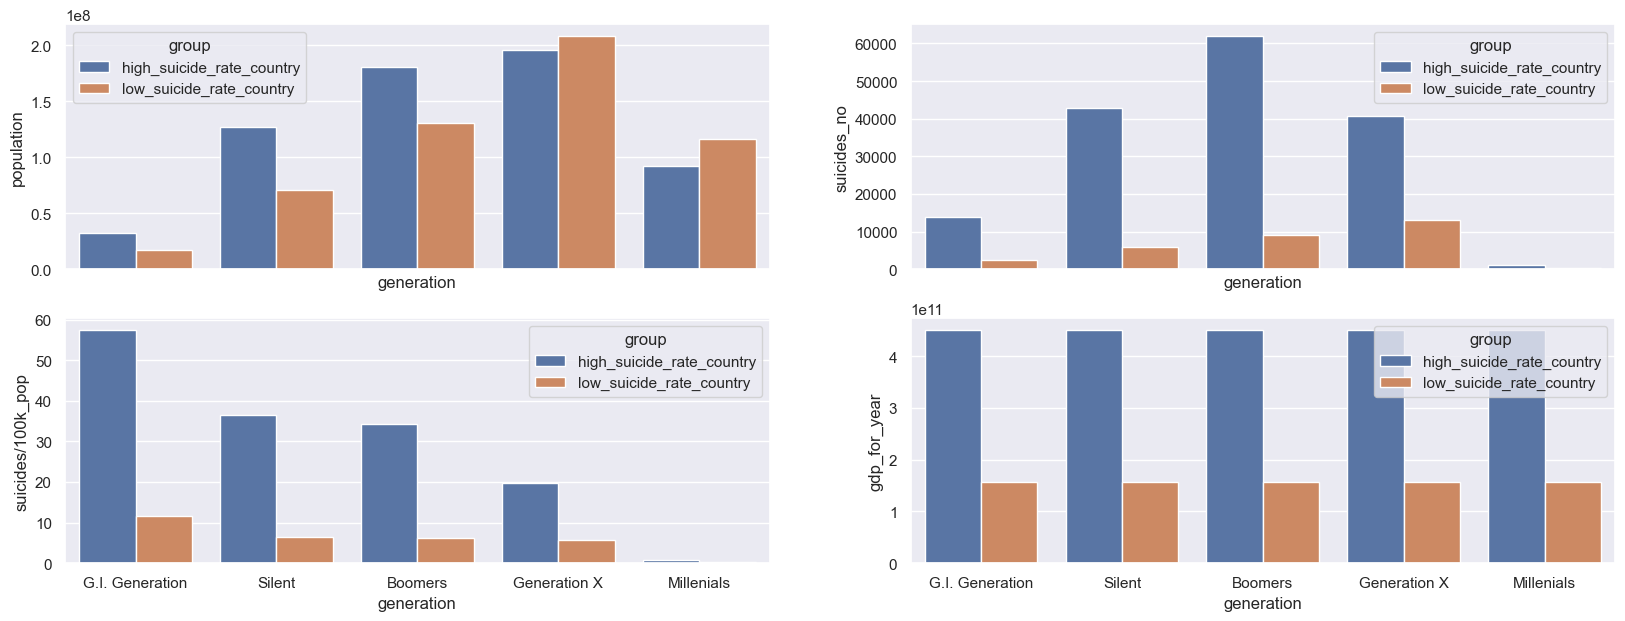

In [35]:
fig, axes = plt.subplots(2,2,sharex=True, figsize=(20,7))
sns.barplot(data_in_1995, x= 'generation', y = 'population', hue='group', order=['G.I. Generation','Silent','Boomers','Generation X','Millenials'], ax =axes[0,0], )

sns.barplot(data_in_1995, x= 'generation', y = 'suicides_no', hue='group', order=['G.I. Generation','Silent','Boomers','Generation X','Millenials'], ax =axes[0,1])
sns.barplot(data_in_1995, x= 'generation', y = 'suicides/100k_pop', hue='group', order=['G.I. Generation','Silent','Boomers','Generation X','Millenials'], ax =axes[1,0])
sns.barplot(data_in_1995, x= 'generation', y = 'gdp_for_year', hue='group', order=['G.I. Generation','Silent','Boomers','Generation X','Millenials'], ax =axes[1,1])




In [36]:
data_in_2010 = grouping_data[grouping_data['year'] == 2010]
data_in_2010

,year,group,generation,population,suicides_no,suicides/100k_pop,gdp_for_year,gdp_per_capita
10,2010,high_suicide_rate_country,Generation X,289935649,70262,21.674732,6.398204e+11,27206.464286
11,2010,low_suicide_rate_country,Generation X,396754971,22539,5.013813,3.191450e+11,16246.825000
12,2010,high_suicide_rate_country,Generation Z,68113080,588,0.959107,6.398204e+11,27206.464286
13,2010,low_suicide_rate_country,Generation Z,159062787,706,0.418500,3.191450e+11,16246.825000
14,2010,high_suicide_rate_country,Millenials,85748871,12317,13.123750,6.398204e+11,27206.464286
15,2010,low_suicide_rate_country,Millenials,160361492,7583,3.507625,3.191450e+11,16246.825000
16,2010,high_suicide_rate_country,Silent,195864116,54040,35.617589,6.398204e+11,27206.464286
17,2010,low_suicide_rate_country,Silent,152385911,10127,4.965438,3.191450e+11,16246.825000


<Axes: xlabel='generation', ylabel='gdp_for_year'>

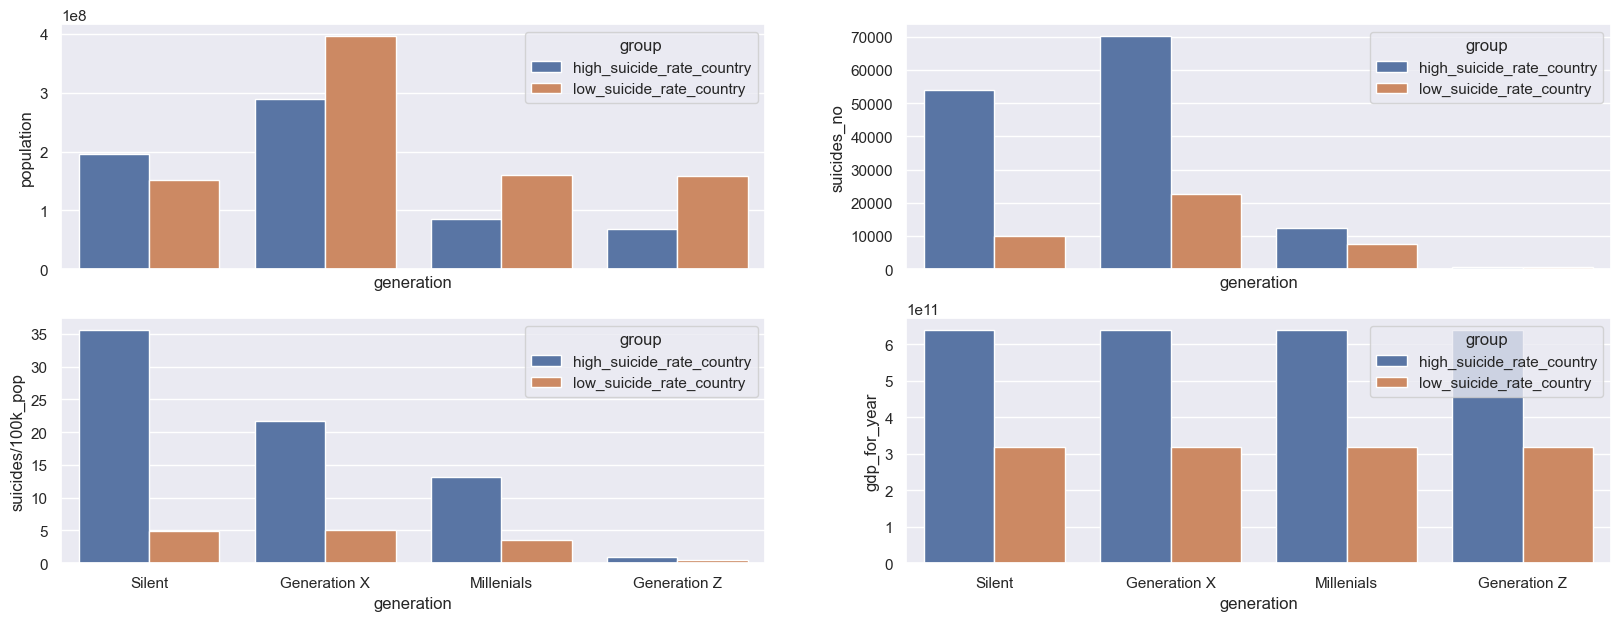

In [37]:
fig, axes = plt.subplots(2,2,sharex=True, figsize=(20,7))
sns.barplot(data_in_2010, x= 'generation', y = 'population', hue='group', order=['Silent','Generation X','Millenials','Generation Z'], ax =axes[0,0])
sns.barplot(data_in_2010, x= 'generation', y = 'suicides_no', hue='group', order=['Silent','Generation X','Millenials','Generation Z'], ax =axes[0,1])
sns.barplot(data_in_2010, x= 'generation', y = 'suicides/100k_pop', hue='group', order=['Silent','Generation X','Millenials','Generation Z'], ax =axes[1,0])
sns.barplot(data_in_2010, x= 'generation', y = 'gdp_for_year', hue='group', order=['Silent','Generation X','Millenials','Generation Z'], ax =axes[1,1])